confidences:
[0.5660499930381775, 0.5815731883049011, 0.7332192063331604, 0.7100450396537781, 0.6852561235427856, 0.6104859113693237, 0.6488890051841736, 0.5781355500221252, 0.9522550702095032, 0.5362473726272583, 0.8584677577018738, 0.5572112798690796, 0.8021819591522217, 0.7042254209518433, 0.633293092250824, 0.620272159576416, 0.7324343323707581, 0.5835912227630615, 0.9416831135749817, 0.6433424353599548, 0.7904655933380127, 0.772010087966919, 0.9376535415649414, 0.7110899686813354, 0.7139278650283813, 0.689845085144043, 0.8756322264671326, 0.868804395198822, 0.9845911860466003, 0.9834968447685242, 0.868596076965332, 0.874717652797699, 0.9468657374382019, 0.9467974901199341, 0.9372896552085876, 0.9473260641098022, 0.911555290222168, 0.9600241184234619, 0.9531179070472717, 0.930280864238739, 0.506242573261261, 0.613498330116272]
Boxes
[[1322, 602, 166, 174], [1322, 603, 167, 172], [1108, 784, 106, 196], [1108, 784, 107, 197], [1725, 967, 39, 84], [1723, 969, 40, 83], [1770, 979, 42, 

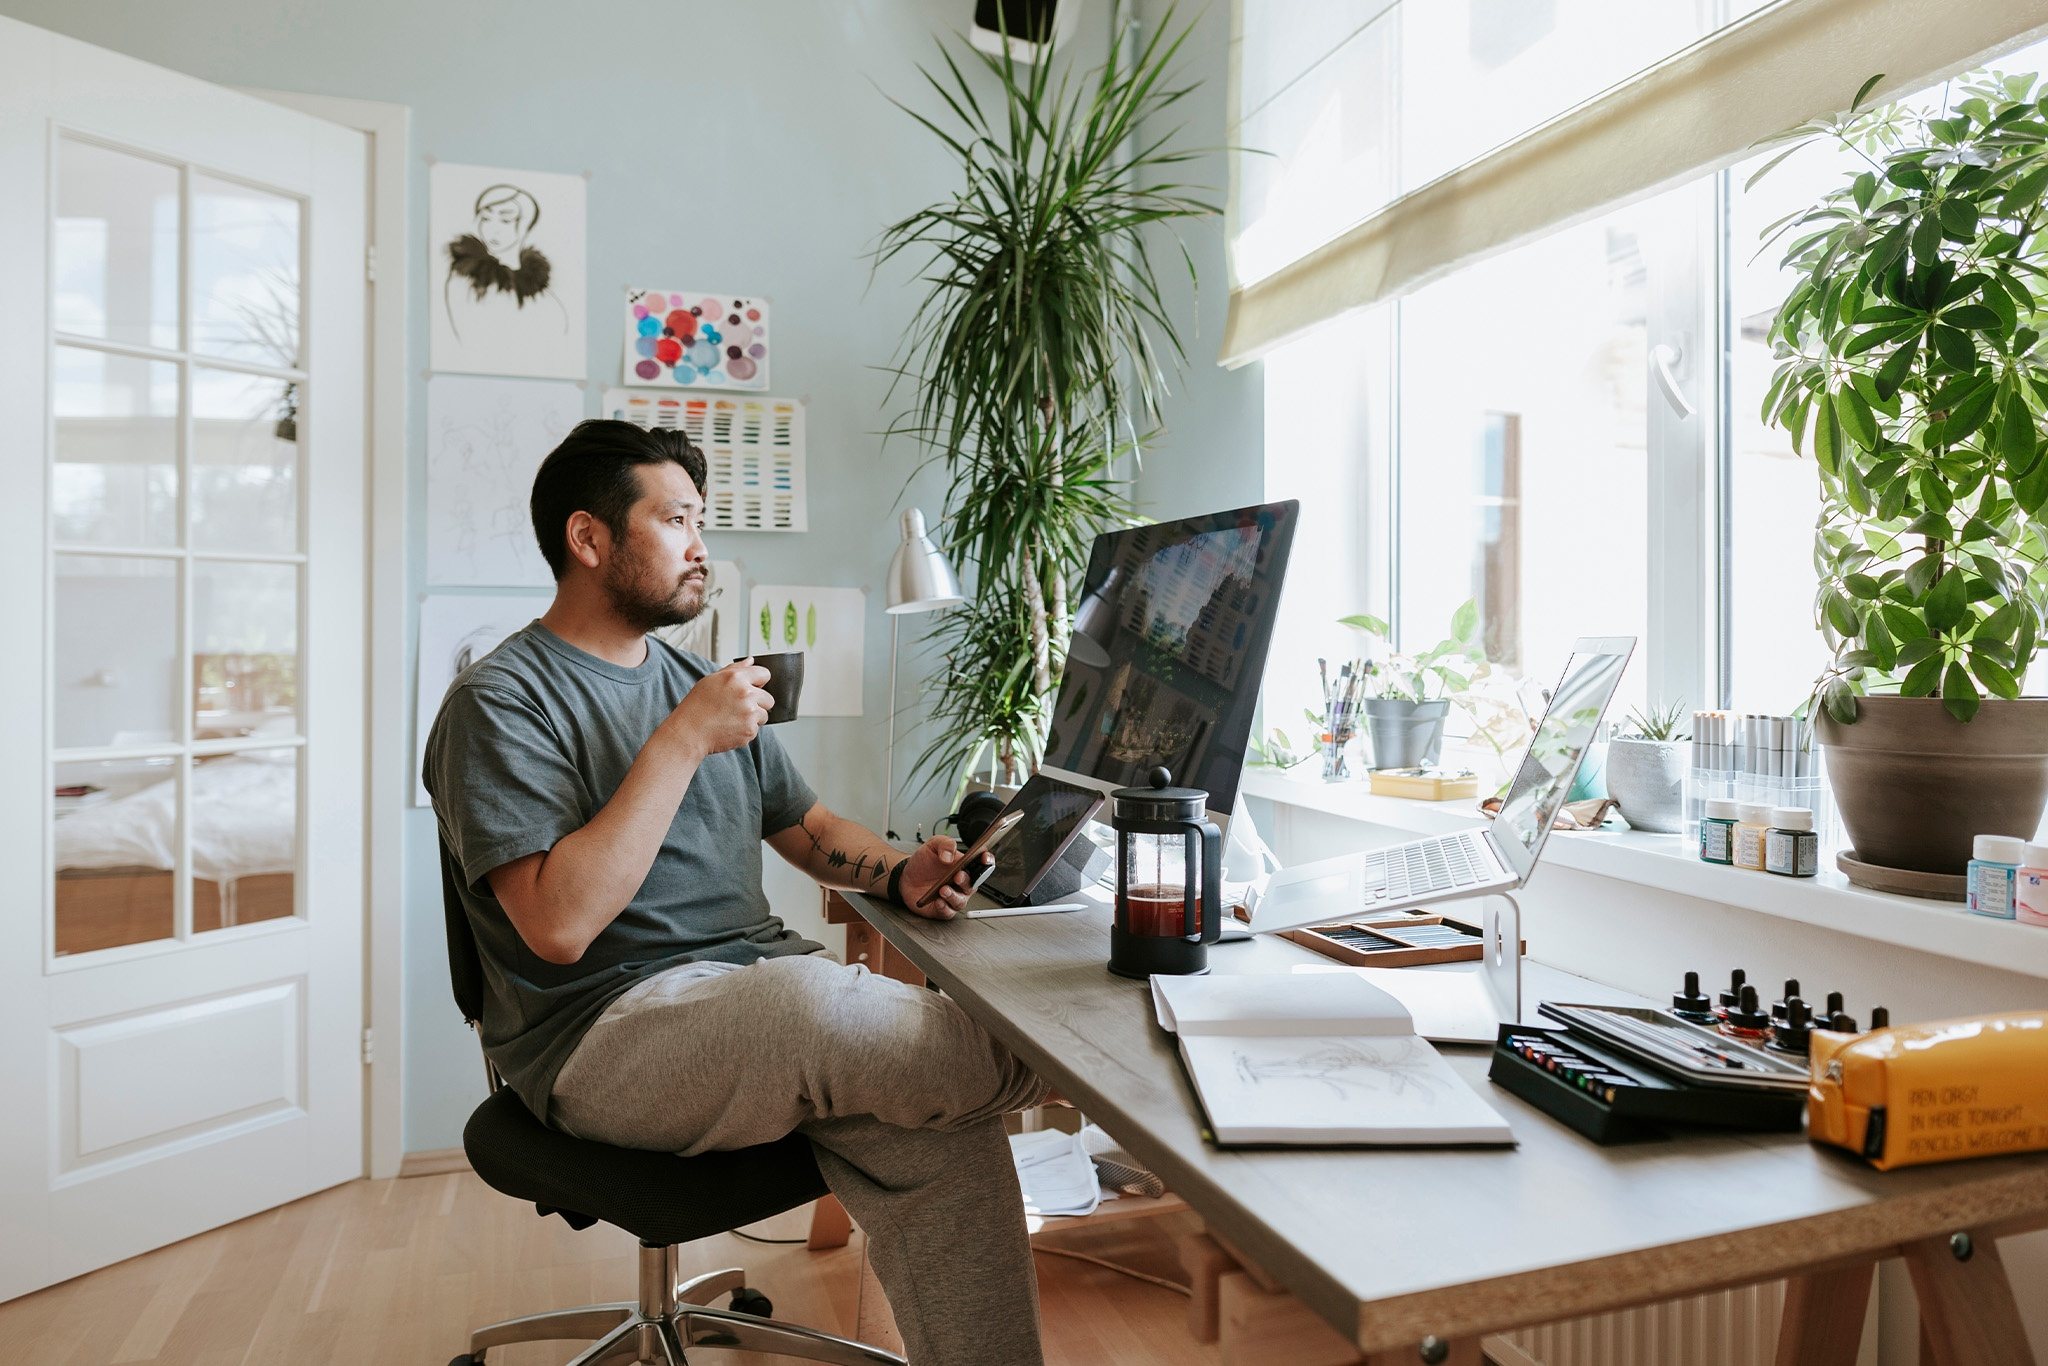

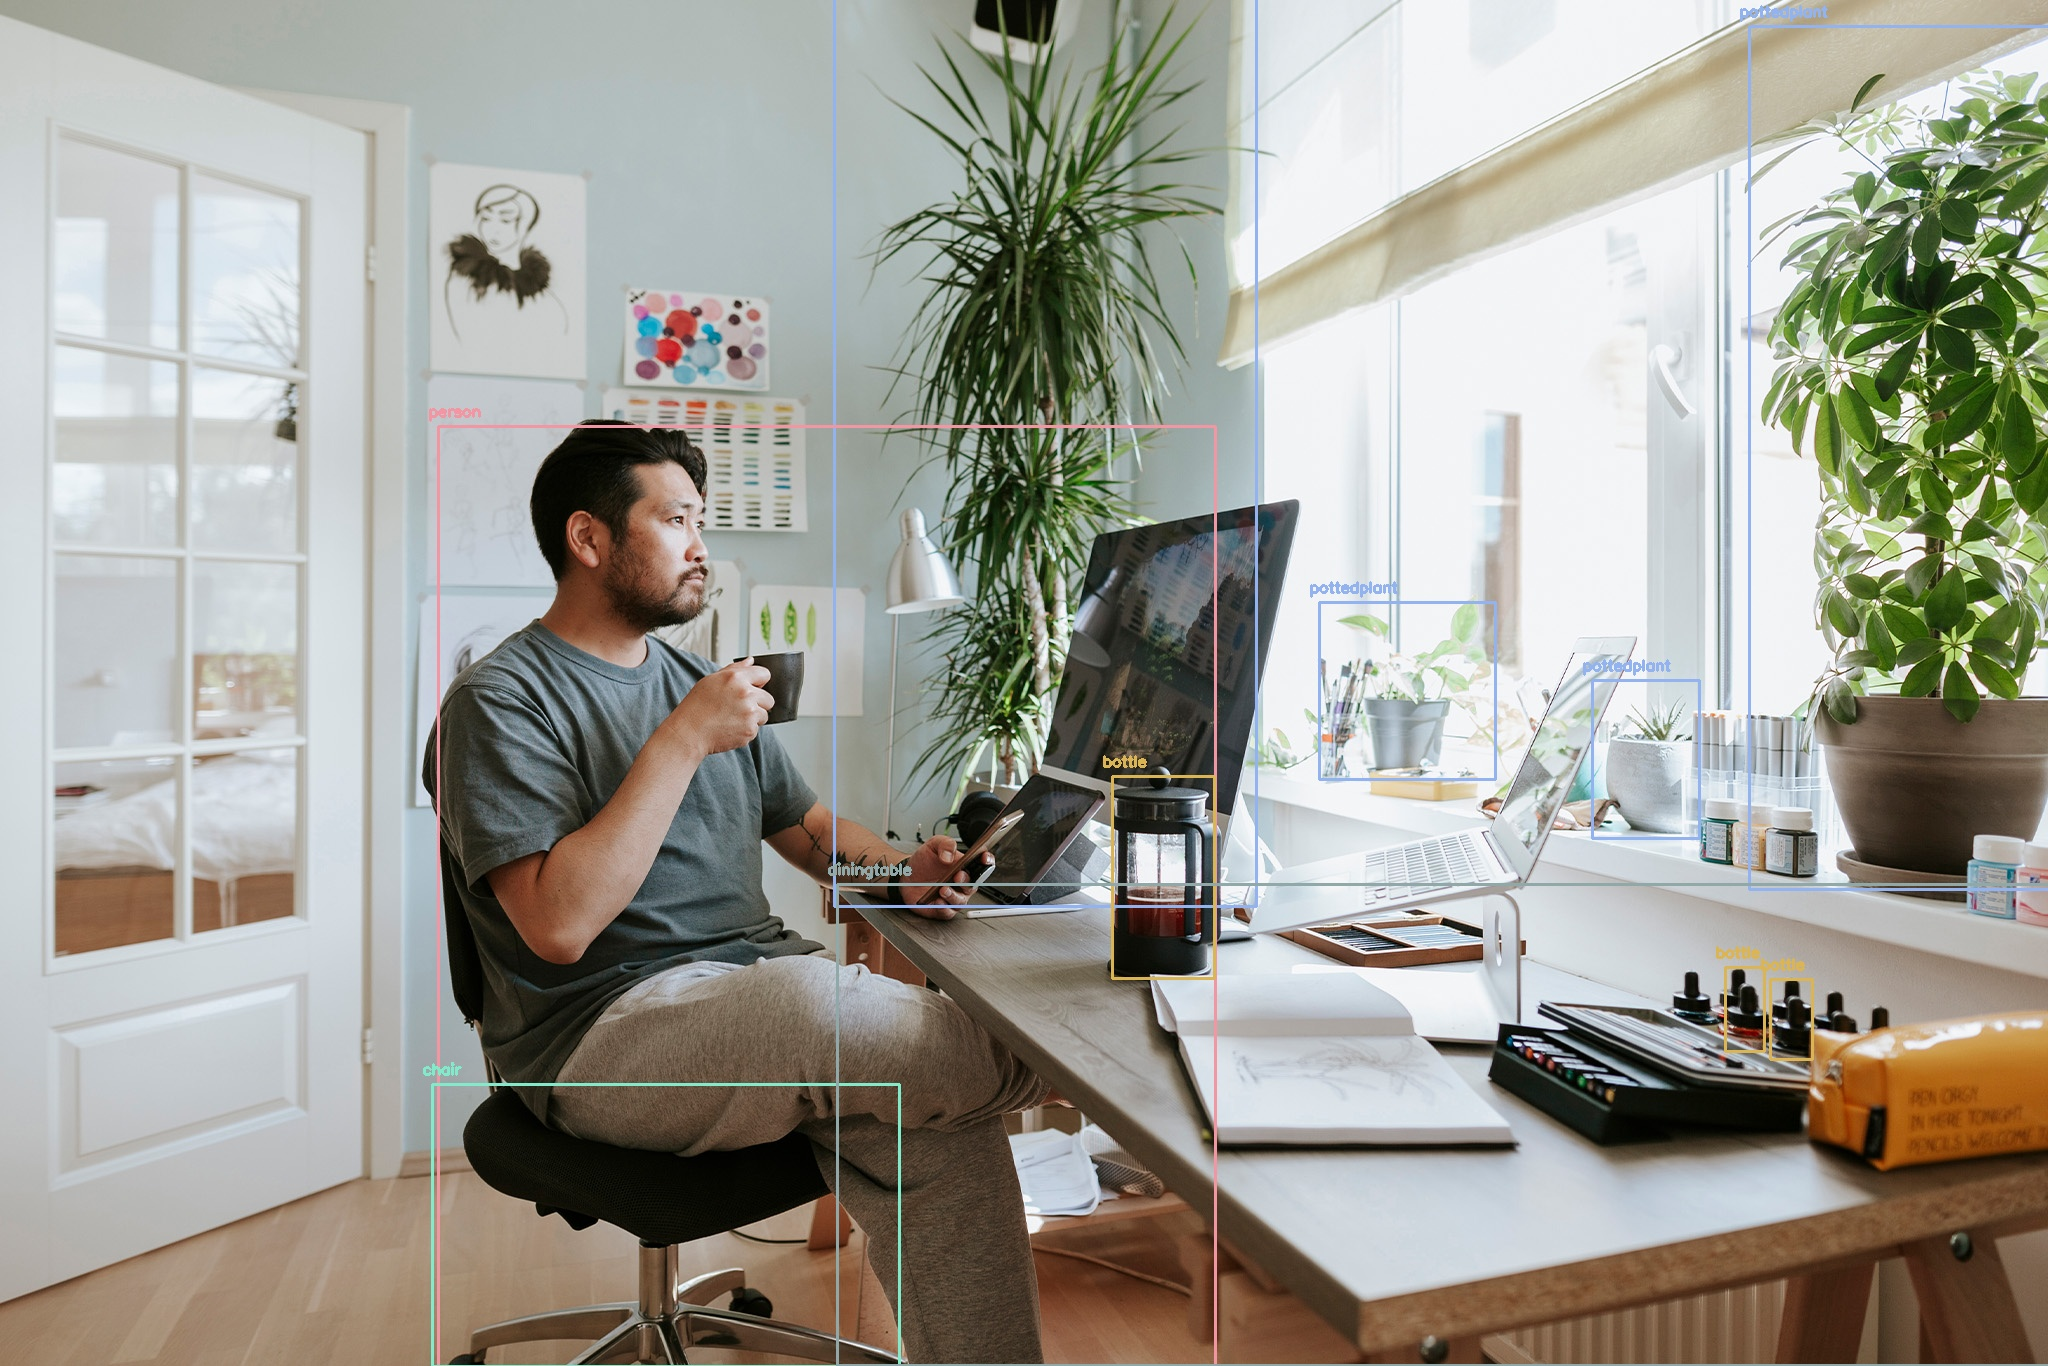

Total objects detected = 10
pottedplants = 4
persons = 1
bottles = 3
chairs = 1
diningtables = 1


In [1]:
#import all the libraries
import cv2
import numpy as np
from IPython.display import display, Image

def get_output_layers(net):
    layer_names = net.getLayerNames()
    try:
        output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    except:
        output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
    cv2.putText(img, label, (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Define your YOLOv4 file paths here
image_path = 'office.jpg'
config_path = 'yolov4.cfg'
weights_path = 'yolov4.weights'
class_path = 'coco.names'

# Read input image
image = cv2.imread(image_path)
Width, Height = image.shape[1], image.shape[0]
scale = 0.00392

# Load classes
with open(class_path, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# Load YOLOv4
net = cv2.dnn.readNet(weights_path, config_path)

# Prepare image for YOLO
blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

# Forward pass and get output layers
outs = net.forward(get_output_layers(net))

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# Process detections
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w // 2
            y = center_y - h // 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])
print("confidences:")
print(confidences)
print("Boxes")
print(boxes)
print("class_ids")
print(class_ids)
# Apply non-maximum suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
print("Indices")
print(indices)

# Dictionary to store counts of detected objects
object_counts = {}

# Count total objects detected
total_objects = len(indices)

# Count objects for each category
for i in indices:
    class_id = class_ids[i]
    label = str(classes[class_id])
    if label not in object_counts:
        object_counts[label] = 1
    else:
        object_counts[label] += 1


# Create a copy of the original image to draw bounding boxes
image_with_boxes = image.copy()

# Draw bounding boxes on the image
for i in indices:
    box = boxes[i]
    x, y, w, h = box
    class_id = class_ids[i]
    confidence = confidences[i]
    draw_prediction(image_with_boxes, class_id, confidence, round(x), round(y), round(x + w), round(y + h))

# Display the original image
display(Image(data=cv2.imencode('.jpg', image)[1].tobytes(), format='jpg'))

# Display the image with bounding boxes
display(Image(data=cv2.imencode('.jpg', image_with_boxes)[1].tobytes(), format='jpg'))

# Display total objects detected
print(f"Total objects detected = {total_objects}")

# Display objects count for each category
for label, count in object_counts.items():
    print(f"{label}s = {count}")

In [ ]:
import cv2
import numpy as np

def get_output_layers(net):
    layer_names = net.getLayerNames()
    try:
        output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    except:
        output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 5)
    cv2.putText(img, label, (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

# Define your YOLOv4 file paths here
video_path = 'road1.mp4'
config_path = 'yolov4.cfg'
weights_path = 'yolov4.weights'
class_path = 'coco.names'

# Load classes
with open(class_path, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Use a constant red color for all bounding boxes
COLORS = [(0, 0, 255)] * len(classes)

# Load YOLOv4
net = cv2.dnn.readNet(weights_path, config_path)

# Open video capture
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    Width, Height = frame.shape[1], frame.shape[0]

    # Prepare image for YOLO
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)

    # Forward pass and get output layers
    outs = net.forward(get_output_layers(net))

    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.5
    nms_threshold = 0.4

    # Process detections
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > conf_threshold:
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = center_x - w // 2
                y = center_y - h // 2
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # Apply non-maximum suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    # Draw bounding boxes on the image
    for i in indices:
        box = boxes[i]
        x, y, w, h = box
        draw_prediction(frame, class_ids[i], confidences[i], round(x), round(y), round(x + w), round(y + h))

    # Display the frame with bounding boxes
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close window
cap.release()
cv2.destroyAllWindows()

In [ ]:
def count_layers(config_path):
    with open(config_path, 'r') as file:
        lines = file.readlines()
    total_layers = 0
    output_layers = []
    maxpool_layers = []

    for line in lines:
        line = line.strip()
        if line.startswith("["):
            total_layers += 1
            if "convolutional" in line or "yolo" in line:
                output_layers.append(total_layers)
            elif "maxpool" in line:
                maxpool_layers.append(total_layers)

    return total_layers,output_layers,maxpool_layers

config_path = "yolov4.cfg"  # Replace with the actual path to your YOLO config file
total_layers, output_layers,maxpool_layers= count_layers(config_path)

print("Total Layers:", total_layers)
print("Output Layers:", output_layers)
print("Maxpool Layers:", maxpool_layers)

In [ ]:
import cv2
import numpy as np

def get_output_layers(net):
    layer_names = net.getLayerNames()
    try:
        output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    except:
        output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
    cv2.putText(img, label, (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Define your YOLOv4 file paths here
config_path = 'yolov4.cfg'
weights_path = 'yolov4.weights'
class_path = 'coco.names'

# Load classes
with open(class_path, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Use a constant red color for all bounding boxes
COLORS = [(0, 0, 255)] * len(classes)

# Load YOLOv4
net = cv2.dnn.readNet(weights_path, config_path)

# Set preferable target for OpenCV DNN
net.setPreferableTarget(cv2.dnn.DNN_TARGET_OPENCL)

# Open webcam capture
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    Width, Height = frame.shape[1], frame.shape[0]

    # Prepare image for YOLO
    blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Forward pass and get output layers
    outs = net.forward(get_output_layers(net))

    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.5
    nms_threshold = 0.4

    # Process detections
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > conf_threshold:
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = center_x - w // 2
                y = center_y - h // 2
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # Apply non-maximum suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    # Draw bounding boxes on the image
    for i in indices:
        box = boxes[i]
        x, y, w, h = box
        draw_prediction(frame, class_ids[i], confidences[i], round(x), round(y), round(x + w), round(y + h))

    # Display the frame with bounding boxes
    cv2.imshow('Webcam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close window
cap.release()
cv2.destroyAllWindows()